<a href="https://colab.research.google.com/github/Kalaikujji/kalai/blob/main/KalaiarasanAI_ML_Intern_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas openpyxl



In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [4]:
print(data.head())

        date        company name     spend  impressions  likecount  \
0 2023-09-05  schneider-electric  5.853525          479         31   
1 2023-09-01  schneider-electric  1.798324         3880        224   
2 2023-09-04  schneider-electric  2.316621          785         55   
3 2023-09-04  schneider-electric  3.944510          658         54   
4 2023-09-04  schneider-electric  3.887850         2568        168   

   commentcount  repostcount  total engagements  conversion action  ...  \
0             0            2                 33           7   Post  ...   
1             1            9                234           0   Post  ...   
2             1           16                 72          11   Post  ...   
3             1            5                 60           8   Post  ...   
4             1            5                174          25   Post  ...   

          voice sentiment text area % empty space %           topic language  \
0  Professional  Positive        0.00         > 

In [3]:
# Load the dataset
file_path = '/content/Rocketium AI_ML Internship Assignment - 2.xlsx'
data = pd.read_excel(file_path)

EDA

In [5]:
print(data.describe())

                                date         spend    impressions  \
count                           1054   1054.000000    1054.000000   
mean   2023-08-22 10:43:29.487666176    213.192991   15075.879507   
min              2023-08-01 00:00:00      0.000000       0.000000   
25%              2023-08-14 00:00:00      6.612433     803.750000   
50%              2023-08-23 00:00:00     23.644911    2577.000000   
75%              2023-09-01 00:00:00     87.314481    7612.250000   
max              2023-09-12 00:00:00  23039.108474  961453.000000   
std                              NaN   1253.414206   67763.338279   

         likecount  commentcount  repostcount  total engagements   conversion  \
count  1054.000000   1054.000000  1054.000000        1054.000000  1054.000000   
mean    197.481973      2.911765    11.707780         212.101518    34.914611   
min       0.000000      0.000000     0.000000           0.000000     0.000000   
25%      33.000000      0.000000     1.000000         

In [6]:
print(data.isnull().sum())

date                                     0
company name                             0
spend                                    0
impressions                              0
likecount                                0
commentcount                             0
repostcount                              0
total engagements                        0
conversion                               0
action                                   0
type                                     0
posturl                                  0
postcontent                              0
profileurl                               0
videourl                               833
sharedposturl                          810
created_at                               0
size                                     0
url                                     83
number of faces                          0
face emotion                           760
face position                          760
face area percentage %                   0
objects    

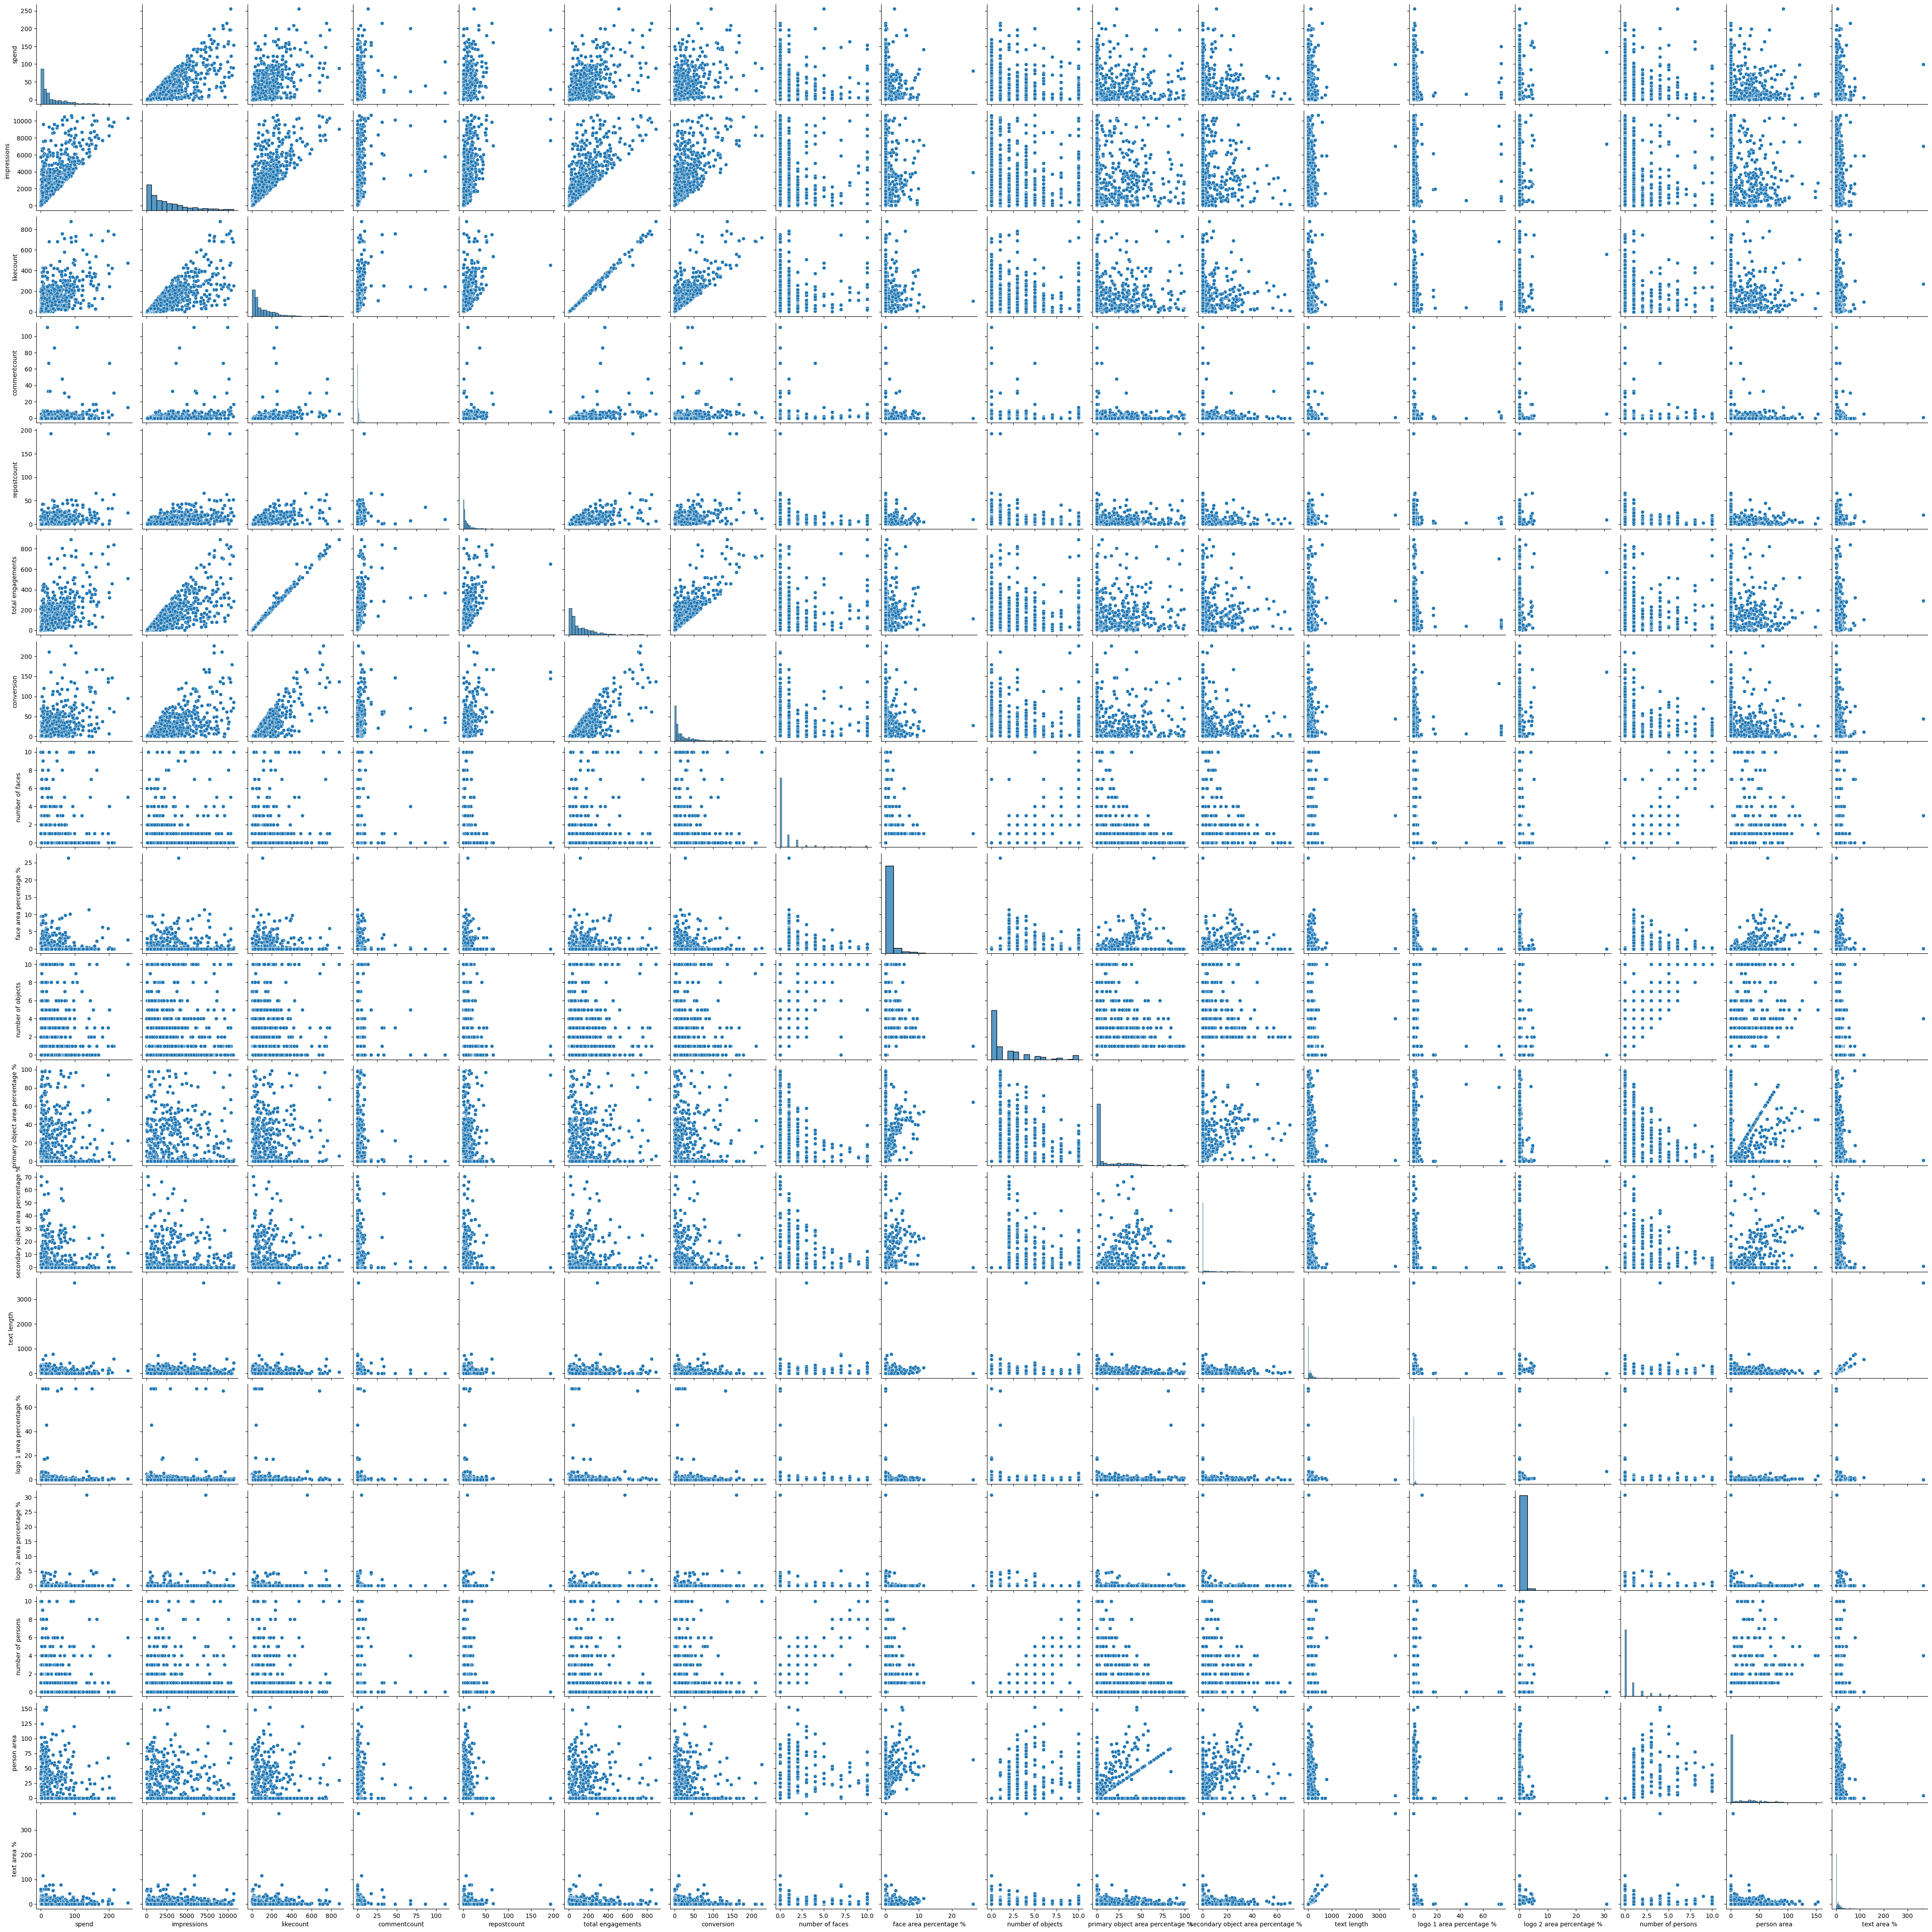

In [55]:
# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()


 #Data Preprocessing#

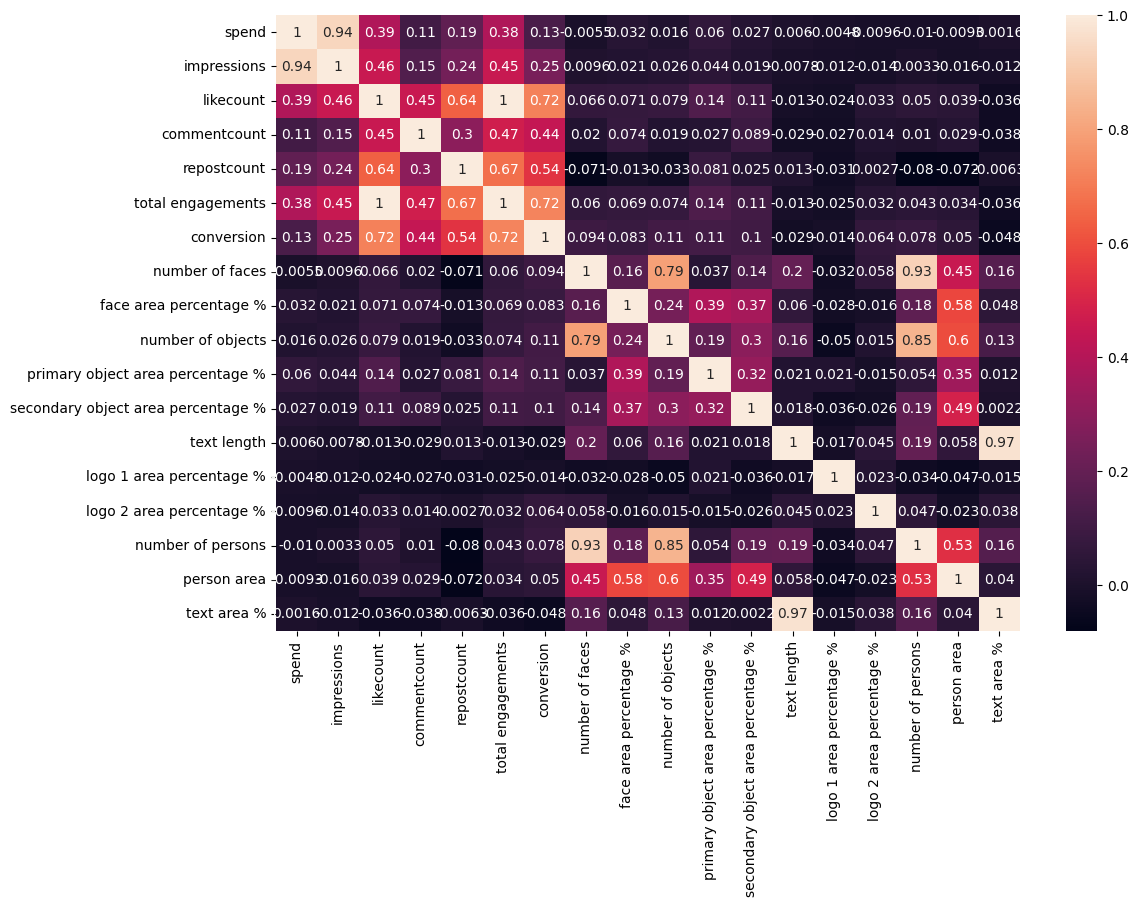

In [8]:
# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data)

# Correlation matrix
numeric_cols = data_encoded.select_dtypes(include=['number']).columns
correlation_matrix = data_encoded[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

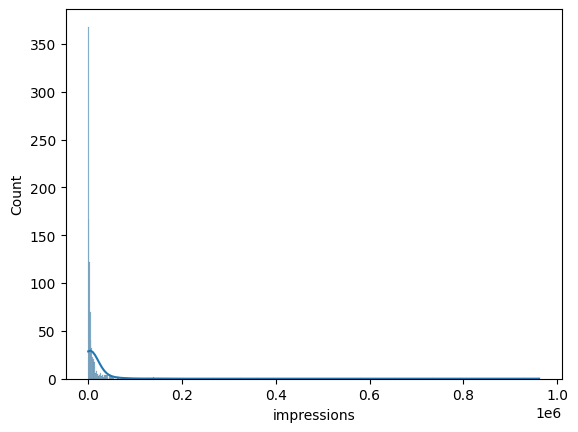

In [10]:
# Distribution of performance metrics
sns.histplot(data['impressions'], kde=True)
plt.show()


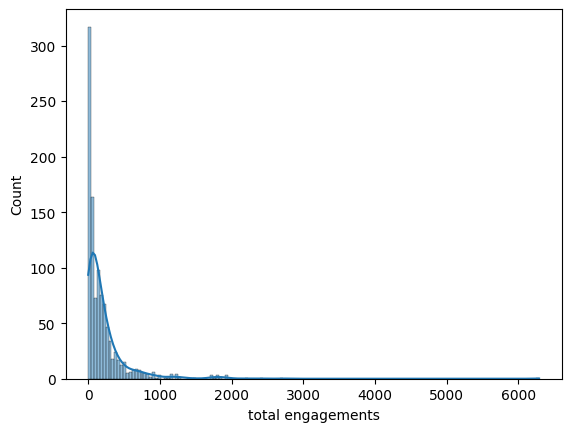

In [16]:
sns.histplot(data['total engagements'], kde=True)
plt.show()



In [44]:
# Check for missing values
print(X_train.isnull().sum())
print(y_train.isnull().sum())

# Fill missing values or drop rows/columns with missing values
X_train.fillna(method='ffill', inplace=True)
X_test.fillna(method='ffill', inplace=True)
y_train.fillna(method='ffill', inplace=True)
y_test.fillna(method='ffill', inplace=True)

date                                  0
company name                          0
spend                                 0
likecount                             0
commentcount                          0
repostcount                           0
total engagements                     0
conversion                            0
action                                0
type                                  0
posturl                               0
postcontent                           0
profileurl                            0
videourl                              0
sharedposturl                         0
created_at                            0
size                                  0
url                                   0
number of faces                       0
face emotion                          0
face position                         0
face area percentage %                0
objects                               0
number of objects                     0
primary object                        0


In [45]:
# Handling outliers
# Example: Removing outliers based on the IQR method for 'impressions'
Q1 = data['impressions'].quantile(0.25)
Q3 = data['impressions'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['impressions'] >= (Q1 - 1.5 * IQR)) & (data['impressions'] <= (Q3 + 1.5 * IQR))]

In [46]:
# Check data types
print(data.dtypes)

date                                  datetime64[ns]
company name                                  object
spend                                        float64
impressions                                  float64
likecount                                    float64
commentcount                                 float64
repostcount                                  float64
total engagements                            float64
conversion                                   float64
action                                        object
type                                          object
posturl                                       object
postcontent                                   object
profileurl                                    object
videourl                                      object
sharedposturl                                 object
created_at                            datetime64[ns]
size                                          object
url                                           

#Model Building#


In [47]:
# Define features and target variable
X = data.drop('impressions', axis=1)
y = data['impressions']

In [48]:

X = X.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, coerce errors to NaN
X.fillna(0, inplace=True)  # Fill NaN values with 0
y = y.apply(pd.to_numeric, errors='coerce')  # Ensure target variable is numeric
y.fillna(0, inplace=True)  # Fill NaN values with 0

# Verify data types
print(X.dtypes)
print(y.dtypes)

date                                    int64
company name                          float64
spend                                 float64
likecount                             float64
commentcount                          float64
repostcount                           float64
total engagements                     float64
conversion                            float64
action                                float64
type                                  float64
posturl                               float64
postcontent                           float64
profileurl                            float64
videourl                              float64
sharedposturl                         float64
created_at                              int64
size                                  float64
url                                   float64
number of faces                       float64
face emotion                          float64
face position                         float64
face area percentage %            

In [49]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Ensure all columns are numeric
print(X.dtypes)

date                                    int64
company name                          float64
spend                                 float64
likecount                             float64
commentcount                          float64
repostcount                           float64
total engagements                     float64
conversion                            float64
action                                float64
type                                  float64
posturl                               float64
postcontent                           float64
profileurl                            float64
videourl                              float64
sharedposturl                         float64
created_at                              int64
size                                  float64
url                                   float64
number of faces                       float64
face emotion                          float64
face position                         float64
face area percentage %            

In [51]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [52]:
# Make predictions
y_pred = model.predict(X_test)

In [53]:
# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')


Mean Squared Error: 1901902.5902928002
R^2 Score: 0.7559126882880224


#Recommendations and Insights#

In [54]:
# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                                     Coefficient
date                                5.466117e-14
company name                       -2.636158e-07
spend                               3.210194e+01
likecount                          -1.650118e+00
commentcount                        7.816039e+00
repostcount                         3.234040e+00
total engagements                   9.399961e+00
conversion                         -1.274122e+00
action                             -5.901057e-12
type                               -1.761258e-12
posturl                            -1.415756e-12
postcontent                        -1.875833e-12
profileurl                         -3.410605e-13
videourl                           -7.176482e-13
sharedposturl                       6.643575e-13
created_at                         -3.002043e-13
size                               -1.314504e-13
url                                 1.394440e-13
number of faces                    -4.996661e+01
face emotion        